In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

import pylab

# Plot Data
This is to plot the decision Line for the end

In [2]:
def plot_data(inputs,targets,weights):
    # fig config
    plt.figure(figsize=(10,6))
    plt.grid(False)
    plt.ylim(20 , 110);
    plt.xlim(20 , 110);

    #plot input samples(2D data points) and i have two classes. 
    #one is +1 and second one is -1, so it red color for +1 and blue color for -1
    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Here i am calculating slope and intercept with given three weights
    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
        plt.plot(i, y,'ko')

In [3]:
pandaData = pd.read_csv("test-score.csv")
pandaData.head() 

,Exam1,Exam2,Pass_NoPass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


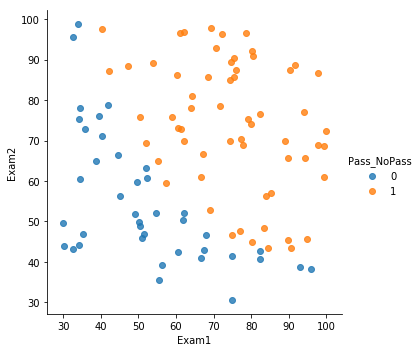

In [4]:
sns.lmplot(data = pandaData , x = "Exam1" , y = "Exam2" , hue = "Pass_NoPass" , fit_reg = False , height = 5, aspect = 1);

# Sigmod Function
This makes the sigmod function

In [5]:
def sigmoidFunction(x):
    g = 1.0 / (1 + np.exp(-x))
    return g;

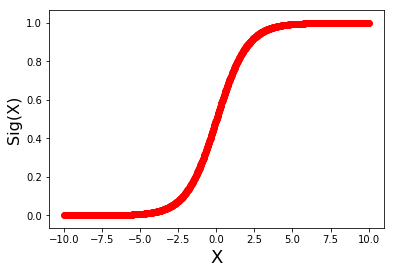

In [6]:
xLine = np.linspace(start = -10, stop = 10 , num=1000)
yLine = sigmoidFunction(xLine);
plt.scatter(xLine , yLine , color='r')
plt.xlabel('X', fontsize=18)
plt.ylabel('Sig(X)', fontsize=16)
plt.show()


# Hypothesis
A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function. From here we will refer to it as sigmoid.
![1_p4hyc2vwjqolwwl_mv0vjw](https://user-images.githubusercontent.com/13907836/47976539-c9ff3880-e067-11e8-9fc2-6b6372864cf5.png)

In [7]:
def hpothesisFunction():
    
    return

In [8]:
npData = pandaData.values; # Covert to NP Array
X = npData[: , 0:2];
y = npData[: , -1];

print(y)
M , numOfFeatures = X.shape;

thetas = np.zeros(numOfFeatures)

# Dot product of Data(M x N) * (N x 1) = (M x 1)
z = np.dot(X , thetas);
h = sigmoidFunction(z);
print(h)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


# Loss function
Functions have parameters/weights (represented by theta in our notation) and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, defined as:
![1_fdxes8iv_43q8caltcjnow](https://user-images.githubusercontent.com/13907836/47976510-9d4b2100-e067-11e8-864c-3cdb99caa8e8.png)

In [9]:
def loss(h, y):
    l = (-y * np.log(h) - (1 - y) * np.log(1 - h));
    calcLoss = l.mean();
    return calcLoss

In [10]:
a = loss(h , y)
print(a)

0.6931471805599453


# Gradient descent
Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. The question is, how do we know what parameters should be biggers and what parameters should be smallers? The answer is given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.
![1_gobkggbrwdaovfaan_hjxq](https://user-images.githubusercontent.com/13907836/47976845-67a73780-e069-11e8-8e73-2158c0cc8e5d.png)

![](C:\Users\lauro\Desktop\ezgif.com-gif-maker (1).gif)




In [11]:
nSamples = X.shape[0];
gradient = np.dot(X.T, (h - y)) / nSamples
print(gradient)

[-12.00921659 -11.26284221]


Then we update the weights by substracting to them the derivative times the learning rate.

In [12]:
npData = pandaData.values; # Covert to NP Array
oneCol = np.ones(len(npData));
npData = np.c_[oneCol , npData];

X = npData[: , 0:3];
y = npData[: , -1];

## FOR PLOTTING
x = npData[:, 1:3]
counter = 0;
##

# weights initialization
theta = np.zeros(X.shape[1])
lr = 0.0014;

num_iter = 8000000;

for i in range(num_iter):
    z = np.dot(X,theta)
    h = sigmoidFunction(z);
    gradient = np.dot(X.T, (h - y)) / y.size;
    theta = theta - (lr * gradient);
    if((i % 4000) == 0):
        plot_data(inputs = x,targets = y,weights = theta);
        iS = str(counter);
        counter = counter + 1
        pngName = "zoro" + iS + ".png";
        pylab.savefig(pngName)
        plt.clf();
        plt.close();

# Final Plot

Final Theta:  [-24.86749219   0.20388138   0.19909395]
Final.png


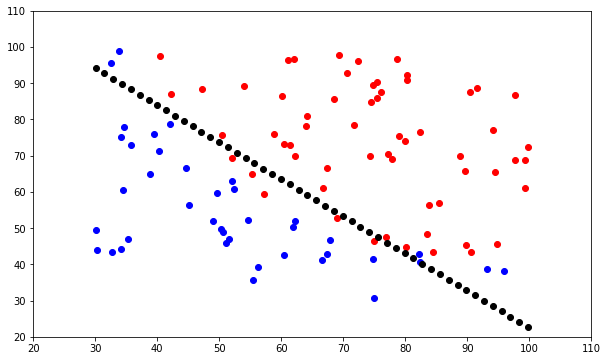

In [13]:
print("Final Theta: " , theta);
x = npData[:, 1:3]
y = npData[:, -1];

plot_data(inputs = x,targets = y,weights = theta);
pngName = "Final.png";
print(pngName)
pylab.savefig(pngName)

# For Future Use ( Not Related to this Program)

In [14]:
#data_pass_label   = np.where(pandaData["Pass_NoPass"] == True)[0]
#data_nopass_label = np.where(pandaData["Pass_NoPass"] == False)[0]

#plt.scatter(x[data_pass_label] , y[data_pass_label] , color='b')
#plt.scatter(x[data_nopass_label] , y[data_nopass_label] , color='r')
# https://ezgif.com/maker
from IPython.display import Image
from IPython.display import display
display(Image(url='./zoro.gif'))
